In [1]:
from nnv import NNV
import numpy as np
import pandas as pd
from random import random
from tabulate import tabulate
import matplotlib.pyplot as plt

num_hidden_n = 3
np.random.seed(0)

def sigmoid(x):
     return 1.0 / (1.0 + np.exp(-x))
    
def sigmoid_derivative(x):
    return x * (1.0 - x)

## NEURAL NETWORK class with feedforward pass and backpropagation

In [2]:
class NN:
    def __init__(self, x, y):
        ''' ~~~Input and output~~~ '''
        ''' The number of input neurons is equal to the number of dataset features '''
        self.x = x
        self.y = y
        
        ''' Weights between neurons'''
        ''' in this example we have 3 neurons in a hidden layer'''
        self.weights_to_hidden = np.random.rand(len(self.x[0]), num_hidden_n)
        self.weights_to_output = np.random.rand(num_hidden_n,1)
        
        ''' ~~~The number of the output neurons depends on the task~~~ ''' 
        ''' One is for regression/classification or two or more for classification'''
        self.output = np.zeros(y.shape)
    
    ''' ~~~Feedforward propagation~~~'''
    ''' After computing the dot product of weight matrix and neuron matrix, '''
    ''' activation function, typicaly non linear differentiable function, is used. '''
    def feedforward(self):
        self.hid = sigmoid(np.dot(self.x, self.weights_to_hidden))
        self.out = sigmoid(np.dot(self.hid, self.weights_to_output))
        
        return self.out
    
    ''' Backpropagation corrects the weights based on the loss function error'''
    def backpropagation(self):
        d_weights_to_output = np.dot(self.hid.T, 2*(self.y - self.output)*sigmoid_derivative(self.output))
        d_weights_to_hidden = np.dot(self.x.T, np.dot(2*(self.y - self.output)*sigmoid_derivative(self.output), \
                                                      self.weights_to_output.T)*sigmoid_derivative(self.hid))
    
        self.weights_to_hidden += d_weights_to_hidden
        self.weights_to_output += d_weights_to_output
        
        return self.weights_to_hidden, self.weights_to_output

    ''' Creates forward and backward pass of the data'''
    def train(self):
        self.output = self.feedforward()
        w1, w2 = self.backpropagation()
        
        return w1, w2
        

## DATASET ~ XOR example

#### XOR dataset can not be solved by simple linear divison of the given space. 
#### Let's try how the simple NN will do...

In [3]:
X = np.array(([0, 0], [1, 1], [0, 1], [1, 0]), dtype=float)
y = np.array(([0], [0], [1], [1]), dtype=float)

input_df = pd.DataFrame(X, columns = ['x', 'y'])
input_df['labels'] = y


print('This is our dataset, each point have [x, y] coordinates and a label')
input_df

This is our dataset, each point have [x, y] coordinates and a label


,x,y,labels
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,1.0,1.0
3,1.0,0.0,1.0


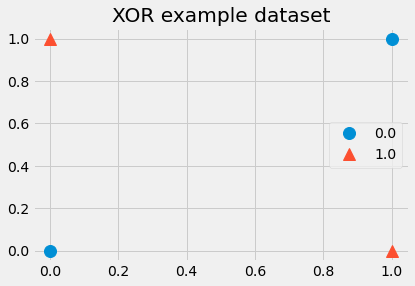

In [4]:
from itertools import cycle
plt.style.use('fivethirtyeight')

groups = input_df.groupby('labels')
markers = ['o', '^']

fig, ax = plt.subplots()
ax.margins(0.05)
for (name, group), marker in zip(groups, cycle(markers)):
    ax.plot(group.x, group.y, marker = marker, linestyle = '', ms = 12, label = name)
ax.legend()
plt.title('XOR example dataset')
plt.show()

## Initialize the Network and show the initial weights

In [5]:
test_nn = NN(X, y)
W1_start, W2_start = test_nn.train()

### Let's look at the initialized weigth matrices

In [6]:
table = tabulate(W1_start, tablefmt="fancy_grid")
print('Weights between the input layer and the hidden layer')
print(table)

Weights between the input layer and the hidden layer
╒══════════╤══════════╤══════════╕
│ 0.536692 │ 0.690741 │ 0.578932 │
├──────────┼──────────┼──────────┤
│ 0.533189 │ 0.400991 │ 0.622809 │
╘══════════╧══════════╧══════════╛


In [7]:
table = tabulate(W2_start, tablefmt="fancy_grid")
print('Weights between the hidden layer and the output layer')
print(table)

Weights between the hidden layer and the output layer
╒══════════╕
│ 0.209582 │
├──────────┤
│ 0.662344 │
├──────────┤
│ 0.731683 │
╘══════════╛


### How does the NN structure look?


~~~~~~~~~~~~~~~~~~ Weights after the initialisation ~~~~~~~~~~~~


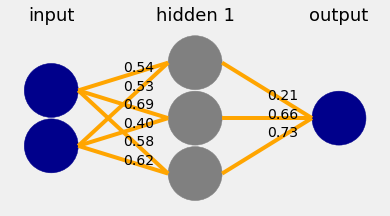

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [8]:
layersList = [
    {"title":"input", "units": len(X[0]), "color": "darkBlue" , "weights": W1_start},
    {"title":"hidden 1", "units": num_hidden_n, "weights": W2_start},
    {"title":"output", "units": 1,"color": "darkBlue", "weights": []},
]

print('\n~~~~~~~~~~~~~~~~~~ Weights after the initialisation ~~~~~~~~~~~~')
NNV(layersList).render()

### Lets train the NN and then look at the weights


~~~~~~~~~~~~~~~~~~ Weights after the initialisation ~~~~~~~~~~~~


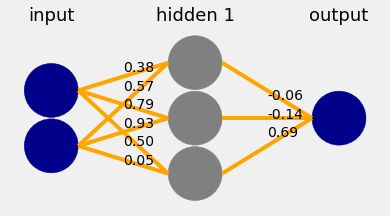


Starting the training:
Iteration # 0 Loss: 0.25475453909948664
Iteration # 100 Loss: 0.24875638005007134
Iteration # 200 Loss: 0.19154522685040123
Iteration # 300 Loss: 0.048820940814324844
Iteration # 400 Loss: 0.015795999401782855
Iteration # 500 Loss: 0.00930016989912142
Iteration # 600 Loss: 0.006588179515578711
Iteration # 700 Loss: 0.005099403261932076
Iteration # 800 Loss: 0.004158175876965868
Iteration # 900 Loss: 0.0035092521090524156
Iteration # 1000 Loss: 0.003034767989783994

~~~~~~~~~~~~~~~~~~ True output vs predicted output in each 100th iteration ~~~~~~~~~~~~
╒═══╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│ 0 │ 0.561 │ 0.495 │ 0.391 │ 0.234 │ 0.161 │ 0.13  │ 0.113 │ 0.101 │ 0.092 │ 0.085 │ 0.079 │
├───┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 0 │ 0.569 │ 0.512 │ 0.512 │ 0.217 │ 0.094 │ 0.062 │ 0.047 │ 0.039 │ 0.033 │ 0.029 │ 0.026 │
├───┼───────┼───────┼───────┼───────┼─────

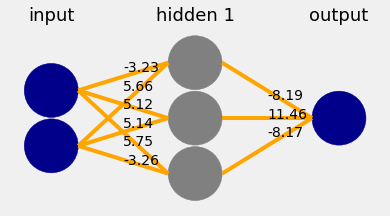

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [9]:
test_nn = NN(X, y)
W1_start, W2_start = test_nn.train()
layersList = [
    {"title":"input", "units": len(X[0]), "color": "darkBlue" , "weights": W1_start},
    {"title":"hidden 1", "units": num_hidden_n, "weights": W2_start},
    {"title":"output", "units": 1,"color": "darkBlue", "weights": []},
]

print('\n~~~~~~~~~~~~~~~~~~ Weights after the initialisation ~~~~~~~~~~~~')
NNV(layersList).render()



header = ["True Output", "Predicted Output"]
res_outputs = y
print('\nStarting the training:')
for i in range(1001):    
    if i % 100 == 0:
        res_outputs = np.hstack([res_outputs, np.around(test_nn.feedforward(), 3)])
        print ("Iteration # " + str(i) + " Loss: " + str(np.mean(np.square(y - test_nn.feedforward()))))        
  
    W1, W2 = test_nn.train()
    
print('\n~~~~~~~~~~~~~~~~~~ True output vs predicted output in each 100th iteration ~~~~~~~~~~~~')
print(tabulate(res_outputs, tablefmt="fancy_grid"  ))    
    
layersList = [
    {"title":"input", "units": len(X[0]), "color": "darkBlue" , "weights": W1},
    {"title":"hidden 1", "units": num_hidden_n, "weights": W2},
    {"title":"output", "units": 1,"color": "darkBlue", "weights": []},
]

print('\n~~~~~~~~~~~~~~~~~~ Weights in the trained network ~~~~~~~~~~~~')
NNV(layersList).render()

## How it is done?

#### Feedforward pass:

In [10]:
input_X = X

In [11]:
## We need two weight matrices, see the picture. One between the input and the hidden layer, one between the hidden and the output layer.
## We can randomly initialize them, so we have a different starting point for each traning session.
weights_to_hidden = np.random.rand(len(X[0]), num_hidden_n)
weights_to_output = np.random.rand(num_hidden_n,1)

In [12]:
## Then we need to compute the dot product of the input matrix X and weights to the hidden layer. 
hidden_1 = np.dot(input_X, weights_to_hidden)

In [13]:
print("dot product between:")
print("input_X:")
print(input_X)

print("\nand weights_to_hidden:")
print(weights_to_hidden)

print("\nis:")
print(hidden_1)

dot product between:
input_X:
[[0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 0.]]

and weights_to_hidden:
[[0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]]

is:
[[0.         0.         0.        ]
 [1.57731532 1.33149151 1.75914752]
 [0.79915856 0.46147936 0.78052918]
 [0.77815675 0.87001215 0.97861834]]


In [14]:
## Same for the output layer: will compute dot product of hidden_1 and weight matrix to the output layer
## Don't get confused by the size of the matrix
## On the picture you can see only one output neuron, it is becouse we are not using just one datapoint.
## Each row in the matrix is a probability of belonging to a given class
## So the one neuron indicates a dimension of the output in axis=1 of numpy array
## Axis=0 is then a number of datapoints we used for the ffw pass
output = np.dot(hidden_1, weights_to_output)
output

array([[0.        ],
       [1.29078505],
       [0.50172179],
       [0.78906326]])

In [15]:
output.shape

(4, 1)

In [ ]:
## Disclaimer: For the visualisation of NN was used adapted script by R. Cordeiro, "NNV: Neural Network Visualizer", 2019. [Online]. Available: https://github.com/renatosc/nnv. [Accessed: DD- Month- 20YY].